### name : Awez Sheikh
### Batch : A2_32
### Practical -04

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
HouseDF = pd.read_csv('Housing.csv')

In [3]:
HouseDF.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
HouseDF.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
HouseDF.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [35]:
X =HouseDF[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

y = HouseDF['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.40, random_state=101)

In [38]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
375,5960,3,1,2,1,1,1,0,0,0,0,2
187,6100,3,1,1,1,0,1,0,1,0,1,1
109,6615,4,2,2,1,1,0,1,0,1,0,1
454,4500,3,1,2,1,0,0,0,1,0,0,2
382,3150,3,1,2,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
316,5900,4,2,2,0,0,1,0,0,1,0,2
393,7424,3,1,1,0,0,0,0,0,0,0,2
75,4260,4,2,2,1,0,0,1,0,0,0,1
337,2145,4,2,1,1,0,1,0,0,0,1,2


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
HouseDF['mainroad'] = le.fit_transform(HouseDF['mainroad'])

In [29]:
HouseDF['guestroom'] = le.fit_transform(HouseDF['guestroom'])
HouseDF['basement'] = le.fit_transform(HouseDF['basement'])
HouseDF['hotwaterheating'] = le.fit_transform(HouseDF['hotwaterheating'])
HouseDF['airconditioning'] = le.fit_transform(HouseDF['airconditioning'])
HouseDF['prefarea'] = le.fit_transform(HouseDF['prefarea'])
HouseDF['furnishingstatus'] = le.fit_transform(HouseDF['furnishingstatus'])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
ln = LinearRegression()

In [39]:
ln.fit(X_train , y_train)

LinearRegression()

In [40]:
coeff_df = pd.DataFrame(ln.coef_,X.columns, columns=['Coefficient'])

In [41]:
coeff_df

,Coefficient
area,2.565613e+02
bedrooms,5.202857e+04
bathrooms,1.013709e+06
stories,4.617353e+05
mainroad,4.198883e+05
guestroom,1.518507e+05
basement,4.528301e+05
hotwaterheating,8.706800e+05
airconditioning,7.969789e+05
parking,2.863661e+05


In [42]:
predictions = ln.predict(X_test)

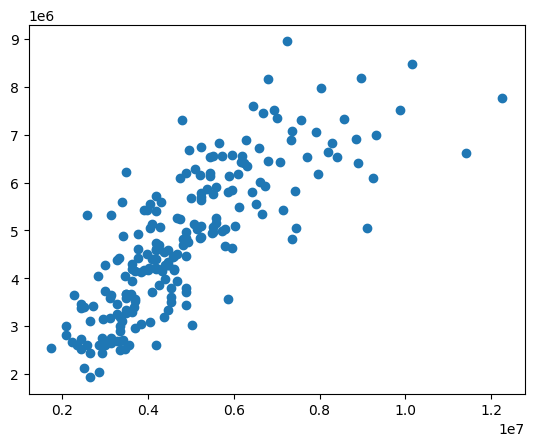

In [43]:
plt.scatter(y_test , predictions)